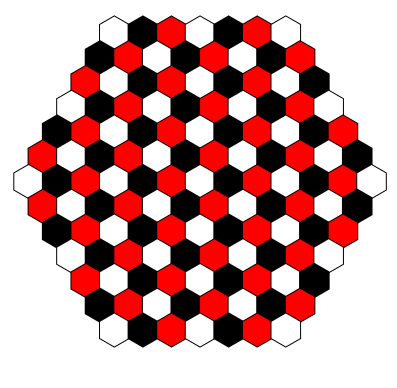

In [3]:
import cairocffi as cairo
import math

#everything below from http://www.pritschet.me/wiki/python/example-scripts-python/2d-graphics-cairo/
#but order needed adjusting because width and height and D used before called
# in way it was on page. Plus I added a comment about `side_fields`
# MAKES A 'six players chess board with hexagonal tiles' ACCORDING TO SITE.

D = 33
# diameter of hexagon in pixels
shift_x = (math.sqrt(3)*D/2., 0)
# vectorial distance to next hexagon in row
shift_y = (math.sqrt(3)*D/4., 3*D/4.)
# vectorial distance to hexagon in next row
side_fields = 7   #This is the number of the colored hexagons that make
# up the overall board that is actually hexagon comprised of small, colored ones
# number of fields along each side. Changing the vaue to 33 makes a lot of tiny
# heaxagons on each side of the board.
width = int((2*side_fields-1)*math.sqrt(3)*D/2.+3*D/4.)+1
# with of surface plus some border in pixels
height = int((2*side_fields-1)*3*D/4.+2*D)+1
# with of surface plus some border in pixels

surface = cairo.ImageSurface (cairo.FORMAT_ARGB32, width, height)
ctx = cairo.Context (surface)

ctx.set_source_rgb(1,1,1)
ctx.rectangle(0,0,width,height)
ctx.fill()

field_colors = ((1,1,1), (0,0,0), (1,0,0))
p = (
    (math.sqrt(3)*D/4., D/4.),
    (0, D/2.),
    (-math.sqrt(3)*D/4., D/4.),
    (-math.sqrt(3)*D/4., -D/4.),
    (0, -D/2.),
    (math.sqrt(3)*D/4.,-D/4.)
)

def hexagon(ctx,color):
    for pair in p:
        ctx.line_to(pair[0],pair[1])
    ctx.close_path()
    ctx.set_source_rgb(0,0,0)
    ctx.stroke_preserve()
    ctx.set_source_rgb(*field_colors[color%3])  #<--- Note the `*` in front of `field_colors[color%3]` is used to unpack as described in  Lorin Hochstein's answer at http://stackoverflow.com/questions/36901/what-does-double-star-and-star-do-for-python-parameters and in (b) in Karan Ahuja's answer there.
    ctx.fill()




fields_in_line = side_fields
increment, decreasing = 1, 0
ctx.translate((side_fields-1)*math.sqrt(3)*D/4.,D)
for j in range(2*side_fields-1):
	if fields_in_line > 2*side_fields-2:
		increment = -1
	for i in range(fields_in_line):
		ctx.translate(shift_x[0],shift_x[1])
		hexagon(ctx,i+j+decreasing)
	ctx.translate(-fields_in_line*shift_x[0],-fields_in_line*shift_x[1])
	ctx.translate(-increment*shift_y[0],shift_y[1])
	if increment == -1:
		decreasing += 1
	fields_in_line += increment
surface.write_to_png('hexach.png')

# Use IPython.display Image function to show the resulting image
from IPython.display import Image
Image('hexach.png')